Description:
The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately.

The dataset contains the following fields:

key - a unique identifier for each trip

fare_amount - the cost of each trip in usd

pickup_datetime - date and time when the meter was engaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

**Acknowledgement**:

The dataset is referred from Kaggle.

**Objective**:

Understand the Dataset & cleanup (if required).

Build Regression models to predict the fare price of uber ride.

Also evaluate the models & compare their respective scores like R2, RMSE, etc.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint

from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
## Importing the data
# Read the Excel file
df = pd.read_csv('/content/uber file.csv',header=0)

In [9]:
df.shape

(200000, 9)

In [10]:
df.sample(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
20195,10515109,27:57.0,5.3,2011-11-03 08:27:57 UTC,0.000000,0.000000,0.000000,0.000000,1
21072,19472157,23:00.0,12.5,2013-07-13 18:23:00 UTC,-73.963770,40.710500,-73.933800,40.698410,3
49362,19158922,21:03.0,7.3,2010-04-04 17:21:03 UTC,-73.961789,40.779671,-73.980748,40.754031,1
134894,33064143,07:00.0,5.3,2009-10-05 19:07:00 UTC,-73.985075,40.736133,-73.991135,40.745345,5
156384,52634201,46:04.0,8.5,2011-02-26 15:46:04 UTC,-73.992138,40.749246,-73.989700,40.726425,1


Data cleaning and pre-processing

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [12]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(199999, 9)

No missing values left

In [15]:
df.duplicated().sum()

0

In [16]:
## Dropping the unnamed column.
df.drop('Unnamed: 0',axis=1,inplace=True)

In [17]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [18]:
df['pickup_datetime'].dtypes

datetime64[ns, UTC]

Feature Extraction

In [19]:
df['Year'] = df['pickup_datetime'].apply(lambda time: time.year)
df['Date'] = df['pickup_datetime'].apply(lambda time: time.day)
df['Hour'] = df['pickup_datetime'].apply(lambda time: time.hour)
df['Month'] = df['pickup_datetime'].dt.month_name()
df['Day of Week'] = df['pickup_datetime'].dt.day_name()

In [20]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Date,Hour,Month,Day of Week
0,52:06.0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,7,19,May,Thursday
1,04:56.0,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,17,20,July,Friday
2,45:00.0,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,24,21,August,Monday
3,22:21.0,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,26,8,June,Friday
4,47:00.0,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,28,17,August,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,49:00.0,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,28,10,October,Sunday
199996,09:00.0,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,14,1,March,Friday
199997,42:00.0,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,29,0,June,Monday
199998,56:25.0,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1,2015,20,14,May,Wednesday


percentage of data which has no information about pick_up latitude and longitude , the drop_off lattitude and longitude


In [21]:
round(df[(df['pickup_latitude'] == 0) & (df['pickup_longitude'] == 0)&(df['dropoff_latitude'] == 0)&(df['dropoff_longitude'] == 0)].shape[0]/len(df)*100,2)

1.79

In [22]:
df = df[~((df['pickup_latitude'] == 0) & (df['pickup_longitude'] == 0) & (df['dropoff_latitude'] == 0) & (df['dropoff_longitude'] == 0))]

In [23]:
df.shape ## Shape of new dataframe.

(196412, 13)

Checking zero values in pickup longitude

In [24]:
df=df[~(df['pickup_longitude']==0)]

In [25]:
df.shape # Dataframe after dropping pickup longitude zero values.

(196213, 13)

Checking zero values in pickup lattitude

In [26]:
df=df[~(df['pickup_latitude']==0)]

In [27]:
df.shape ## Dataframe after dropping pickup latitude zero values.

(196210, 13)

Checking zero values in dropoff lattitude and longitude

In [28]:
df=df[~(df['dropoff_longitude']==0)]

In [29]:
df1=df[~(df['dropoff_latitude']==0)]

Dataframe after dropping zero values from latitudes and longitudes


In [30]:
df1.shape ## Final dataframe after dropping zero values from latitudes and longitudes

(196031, 13)

Checking Fare_Amount target Column

In [31]:
df2=df1[~(df1['fare_amount']<=0)] ## Removing negative and zero fare amount rows from dataframe

In [32]:
df2.shape

(196012, 13)

Checking passenger_count variable

In [33]:
df2['passenger_count'].value_counts()

passenger_count
1      135633
2       28863
5       13739
3        8705
6        4202
4        4183
0         686
208         1
Name: count, dtype: int64

In [34]:
df3 = df2[~((df2['passenger_count'] == 0) | (df2['passenger_count'] > 6))]

In [35]:
df3.shape

(195325, 13)

Checking for validity of longitudes and latitudes.
Typically, latitudes range from -90 to 90, and longitude range from 180 and -180.

In [36]:
df4=df3[~((df3['pickup_longitude']>180) | (df3['pickup_longitude']<-180))]

In [37]:
df4=df4[~((df4['dropoff_longitude']>180) | (df4['dropoff_longitude']<-180))]

In [38]:
df4=df4[~((df4['pickup_latitude']>90) | (df4['pickup_latitude']<-90))]

In [39]:
df4=df4[~((df4['dropoff_latitude']>90) | (df4['dropoff_latitude']<-90))]

In [40]:
df5=df4
df5

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Date,Hour,Month,Day of Week
0,52:06.0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,7,19,May,Thursday
1,04:56.0,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,17,20,July,Friday
2,45:00.0,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,24,21,August,Monday
3,22:21.0,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,26,8,June,Friday
4,47:00.0,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,28,17,August,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,49:00.0,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,28,10,October,Sunday
199996,09:00.0,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,14,1,March,Friday
199997,42:00.0,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,29,0,June,Monday
199998,56:25.0,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1,2015,20,14,May,Wednesday


Feature Construction

In [41]:
## Manhattan Distance.
df5['manhattan_distance'] = abs(df5['pickup_longitude'] - df5['dropoff_longitude']) + abs(df5['pickup_latitude'] - df5['dropoff_latitude'])

In [42]:
df5

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Date,Hour,Month,Day of Week,manhattan_distance
0,52:06.0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,7,19,May,Thursday,0.015442
1,04:56.0,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,17,20,July,Friday,0.022455
2,45:00.0,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,24,21,August,Monday,0.074355
3,22:21.0,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,26,8,June,Friday,0.023313
4,47:00.0,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,28,17,August,Thursday,0.065221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,49:00.0,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,28,10,October,Sunday,0.001447
199996,09:00.0,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,14,1,March,Friday,0.024733
199997,42:00.0,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,29,0,June,Monday,0.190959
199998,56:25.0,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1,2015,20,14,May,Wednesday,0.043945


Analysing the variables

Manhattan distance

In [43]:
df5['manhattan_distance'].describe()

count    195313.000000
mean          0.057527
std           0.945635
min           0.000000
25%           0.016407
50%           0.028161
75%           0.050839
max         114.768053
Name: manhattan_distance, dtype: float64

Removing the probable outliers > (Q3+3*IQR), as per Tukey's.

In [44]:
df6=df5[~(df5['manhattan_distance'] > (df5['manhattan_distance'].quantile(0.75) + 3 * (df5['manhattan_distance'].quantile(0.75) - df5['manhattan_distance'].quantile(0.25))))]

In [45]:

df6

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Date,Hour,Month,Day of Week,manhattan_distance
0,52:06.0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,7,19,May,Thursday,0.015442
1,04:56.0,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,17,20,July,Friday,0.022455
2,45:00.0,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,24,21,August,Monday,0.074355
3,22:21.0,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,26,8,June,Friday,0.023313
4,47:00.0,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,28,17,August,Thursday,0.065221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,42:00.0,12.0,2014-01-31 14:42:00+00:00,-73.983070,40.760770,-73.972972,40.754177,1,2014,31,14,January,Friday,0.016691
199995,49:00.0,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,28,10,October,Sunday,0.001447
199996,09:00.0,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,14,1,March,Friday,0.024733
199998,56:25.0,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1,2015,20,14,May,Wednesday,0.043945


Also Manhattan distance cannot be equal to zero.

In [46]:
df7=df6[~(df6['manhattan_distance']==0)]

In [47]:
df7

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Date,Hour,Month,Day of Week,manhattan_distance
0,52:06.0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,7,19,May,Thursday,0.015442
1,04:56.0,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,17,20,July,Friday,0.022455
2,45:00.0,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,24,21,August,Monday,0.074355
3,22:21.0,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,26,8,June,Friday,0.023313
4,47:00.0,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,28,17,August,Thursday,0.065221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,42:00.0,12.0,2014-01-31 14:42:00+00:00,-73.983070,40.760770,-73.972972,40.754177,1,2014,31,14,January,Friday,0.016691
199995,49:00.0,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,28,10,October,Sunday,0.001447
199996,09:00.0,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,14,1,March,Friday,0.024733
199998,56:25.0,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1,2015,20,14,May,Wednesday,0.043945


In [48]:
df7['manhattan_distance'].describe()

count    1.860120e+05
mean     3.664911e-02
std      2.910558e-02
min      1.000000e-06
25%      1.634573e-02
50%      2.741650e-02
75%      4.712700e-02
max      1.541250e-01
Name: manhattan_distance, dtype: float64

In [49]:
# Calculate the quartile values
q1 = df7['manhattan_distance'].quantile(0.25)
q2 = df7['manhattan_distance'].quantile(0.5)
q3 = df7['manhattan_distance'].quantile(0.75)

# Calculate the whisker values
iqr = q3 - q1
lower = q1 - 3 * iqr
upper = q3 + 3 * iqr
print("Probable outlier's would be any value below ",lower,'or any value above',upper)

Probable outlier's would be any value below  -0.07599806000003184 or any value above 0.139470795000042


Removing any value beyond this range , treating the probable outliers

In [50]:
df8=df7[(df7['manhattan_distance']>-0.07599806665037079)|(df7['manhattan_distance']<0.13947079998777134)]

In [51]:
df8.shape

(186012, 14)

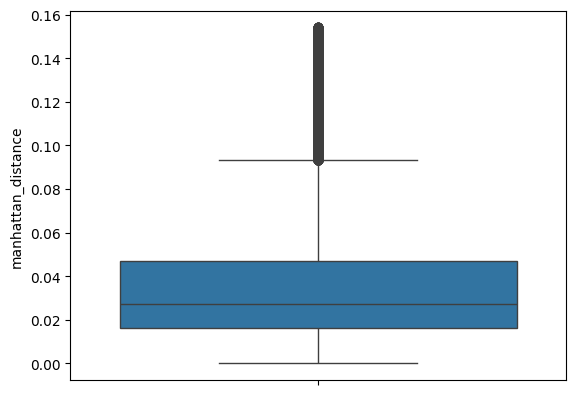

In [52]:
sns.boxplot(df8['manhattan_distance'])
plt.show() ## Whiskers here are at 1.5IQR but we have removed only values which are beyond 3*IQR.

In [53]:
df8['manhattan_distance'].sort_values(ascending=True).head(15)

42732     1.000000e-06
176333    1.000000e-06
32378     1.000000e-06
198655    1.000000e-06
119189    1.000000e-06
163148    1.000000e-06
14116     1.000000e-06
113686    1.000000e-06
1531      1.000000e-06
76904     1.000000e-06
198842    1.000000e-06
93978     2.000000e-06
8243      2.000000e-06
91056     2.000000e-06
11301     2.000000e-06
Name: manhattan_distance, dtype: float64

We see there are manhattan distance values which are very small, this is anomalous. We need to treat them as well. But we will check it later.


Fare_Amount

In [54]:
df8['fare_amount'].describe()

count    186012.000000
mean         10.087343
std           6.787497
min           0.010000
25%           6.000000
50%           8.100000
75%          12.000000
max         499.000000
Name: fare_amount, dtype: float64

In [55]:
df8['fare_amount'].value_counts().sort_index()

fare_amount
0.01        2
0.11        1
2.50      577
2.90      439
3.00      328
         ... 
180.00      1
183.00      1
196.00      1
220.00      1
499.00      1
Name: count, Length: 804, dtype: int64

For any car ride service there is a base fare, here, from the data points , we are assuming this base fare is 2.5. hence we are removing all the rows with fare less than and equal to 2.5

In [56]:
df9=df8[df8['fare_amount']>2.5]

In [57]:
df9

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Date,Hour,Month,Day of Week,manhattan_distance
0,52:06.0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,7,19,May,Thursday,0.015442
1,04:56.0,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,17,20,July,Friday,0.022455
2,45:00.0,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,24,21,August,Monday,0.074355
3,22:21.0,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,26,8,June,Friday,0.023313
4,47:00.0,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,28,17,August,Thursday,0.065221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,42:00.0,12.0,2014-01-31 14:42:00+00:00,-73.983070,40.760770,-73.972972,40.754177,1,2014,31,14,January,Friday,0.016691
199995,49:00.0,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,28,10,October,Sunday,0.001447
199996,09:00.0,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,14,1,March,Friday,0.024733
199998,56:25.0,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1,2015,20,14,May,Wednesday,0.043945


In [58]:
# Calculate the quartile values
q1 = df9['fare_amount'].quantile(0.25)
q2 = df9['fare_amount'].quantile(0.5)
q3 = df9['fare_amount'].quantile(0.75)

# Calculate the fences values
iqr = q3 - q1
lower = q1 - 3 * iqr
upper = q3 + 3 * iqr
print("Probable outlier's would be any value below ",lower,'or any value above',upper)

Probable outlier's would be any value below  -12.0 or any value above 30.0


Removing probable outlier's here, because the purpose is prediction of Uber Fares rather than only analysis of variables.

In [59]:
df10=df9[df9['fare_amount']<30]

In [60]:
df10['manhattan_distance'].sort_values(ascending=True)

76904     0.000001
13374     0.000002
8243      0.000002
48771     0.000002
141159    0.000002
            ...   
39004     0.153972
113853    0.154060
141127    0.154073
146165    0.154112
72986     0.154123
Name: manhattan_distance, Length: 181462, dtype: float64

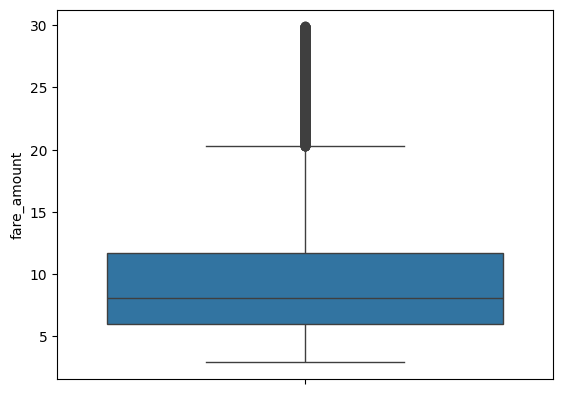

In [61]:
sns.boxplot(df10['fare_amount'])
plt.show() ## whisker's are 1.5 IQR but we have removed only values which are above 3*IQR.

In [62]:

final_df=df10
print('% of rows dropped in the final dataframe is',round((200000-len(final_df))/200000*100,2))

% of rows dropped in the final dataframe is 9.27


Exploratory Data Analysis

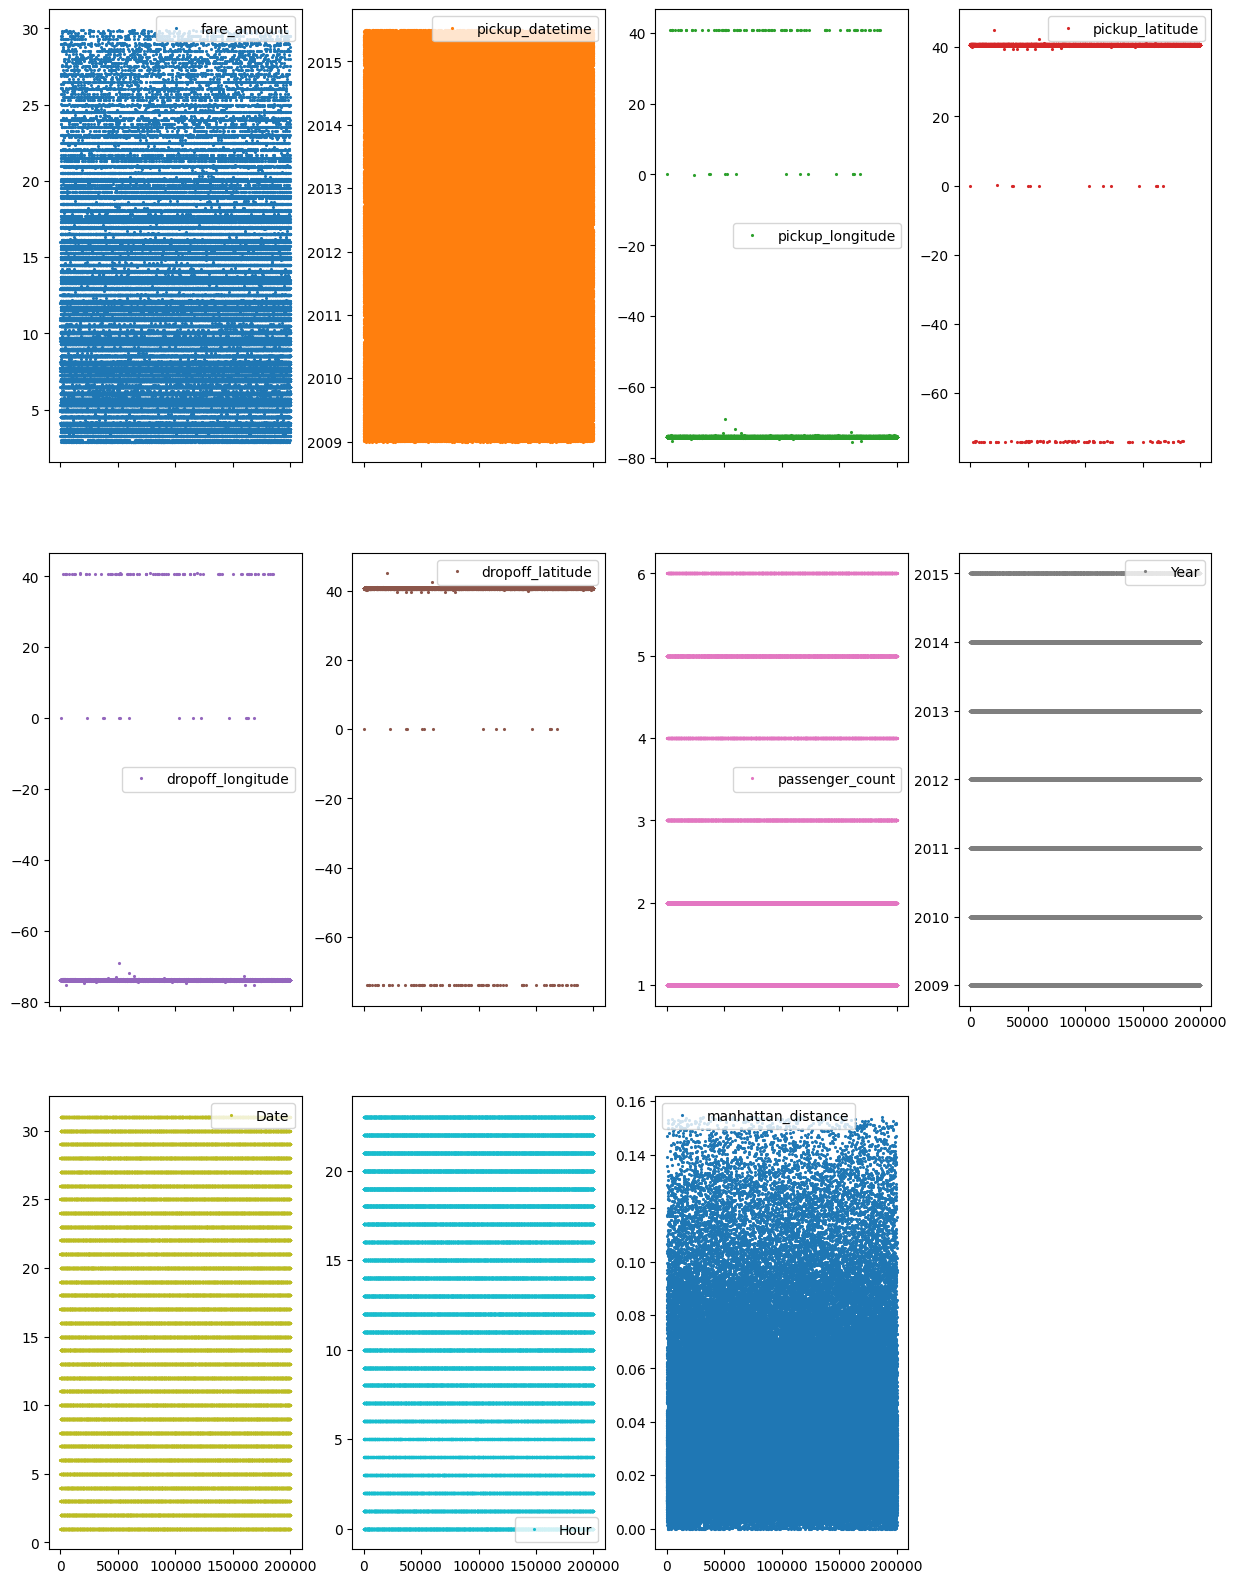

In [63]:
##Basic understanding of numerical data

final_df.plot(lw=0,marker='.',subplots=True,layout=(-1,4),figsize=(15,20),markersize=2.5)
plt.show()

In [64]:
final_df.corr()

ValueError: could not convert string to float: '52:06.0'

Target Variable=Fare_Amount

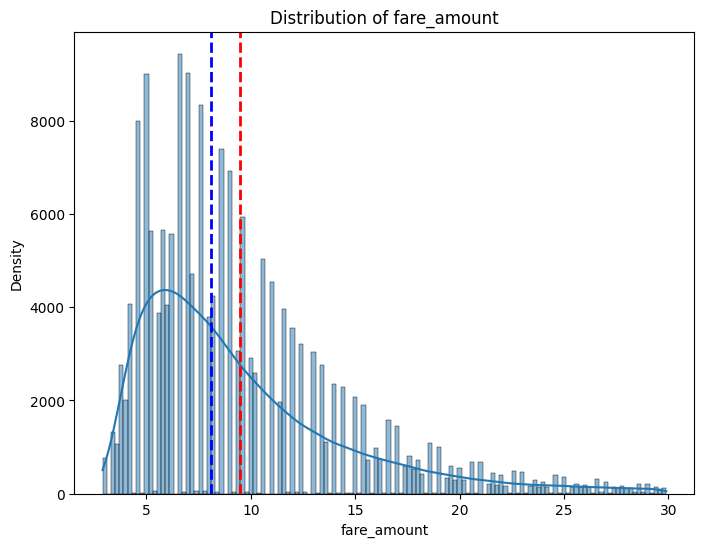

In [65]:
# Histogram of 'fare_amount'
plt.figure(figsize=(8, 6))
sns.histplot(final_df['fare_amount'], kde=True)
plt.xlabel('fare_amount')
plt.ylabel('Density')
plt.title('Distribution of fare_amount')


# Add vertical lines for mean and median
plt.axvline(final_df['fare_amount'].mean(), color='red', linestyle='dashed', linewidth=2) ## Red line is Mean.
plt.axvline(final_df['fare_amount'].median(), color='blue', linestyle='dashed', linewidth=2)

plt.show()

This shows a right skewed distribution.

In [66]:

## Using Shapiro-Wilk's test.
from scipy.stats import shapiro

# Checking if target variable is normal or not.
stat, p_value = shapiro(final_df['fare_amount'])

alpha = 0.05  # Set significance level
if p_value > alpha:
    print("Data follows a normal distribution.")
else:
    print("Data does not follow a normal distribution.")

Data does not follow a normal distribution.


It's an important finding, because we will be using linear regression which assumes normality of data.

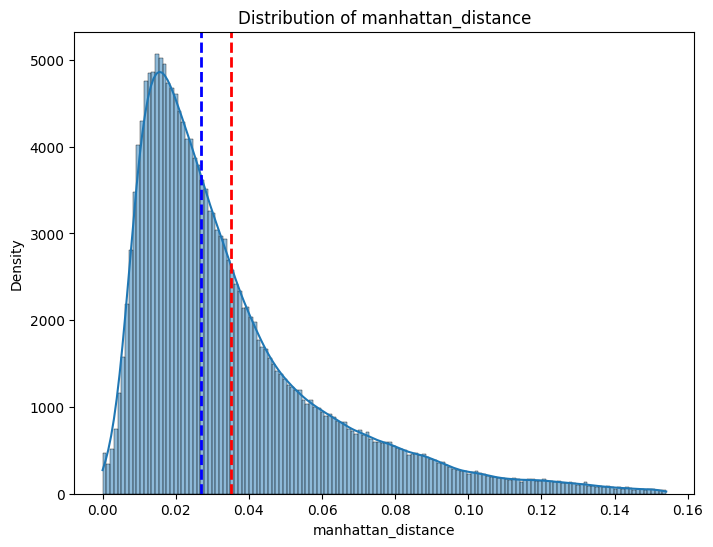

In [67]:
# Histogram of 'manhattan_distance'
plt.figure(figsize=(8, 6))
sns.histplot(final_df['manhattan_distance'], kde=True)
plt.xlabel('manhattan_distance')
plt.ylabel('Density')
plt.title('Distribution of manhattan_distance')


# Add vertical lines for mean and median
plt.axvline(final_df['manhattan_distance'].mean(), color='red', linestyle='dashed', linewidth=2) ## Red line is Mean.
plt.axvline(final_df['manhattan_distance'].median(), color='blue', linestyle='dashed', linewidth=2)
plt.show()


Thus, data is right skewed.

In [68]:
## Using Shapiro-Wilk's test.
from scipy.stats import shapiro

# Checking if target variable is normal or not.
stat, p_value = shapiro(final_df['manhattan_distance'])

alpha = 0.05  # Set significance level
if p_value > alpha:
    print("Data follows a normal distribution.")
else:
    print("Data does not follow a normal distribution.")

Data does not follow a normal distribution.


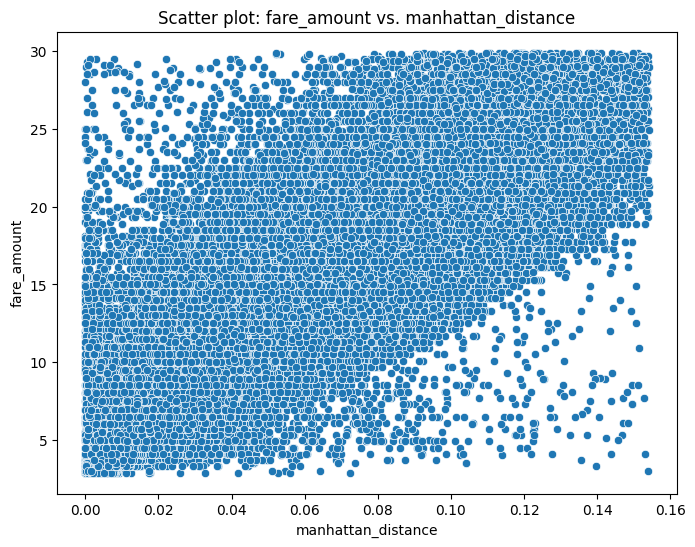

In [70]:
# Scatter plot of 'fare_amount' vs. 'manhattan_distance'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=final_df['manhattan_distance'], y=final_df['fare_amount'])
plt.xlabel('manhattan_distance')
plt.ylabel('fare_amount')
plt.title('Scatter plot: fare_amount vs. manhattan_distance')
plt.show()

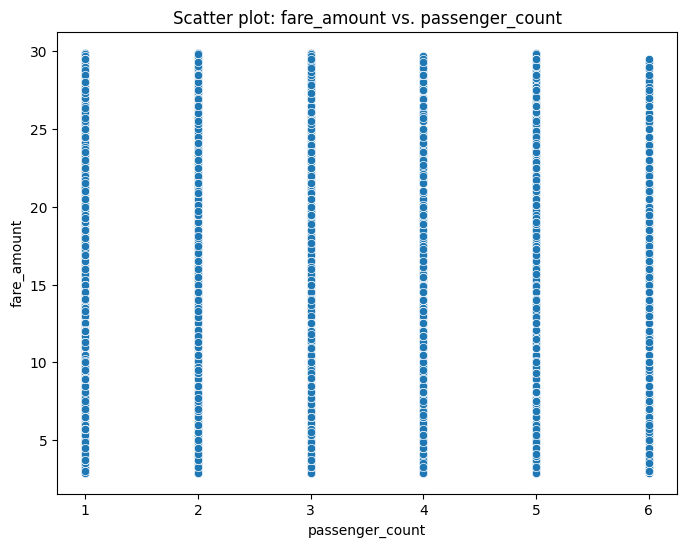

In [69]:
# Scatter plot of 'fare_amount' vs. 'passenger_count'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=final_df['passenger_count'], y=final_df['fare_amount'])
plt.xlabel('passenger_count')
plt.ylabel('fare_amount')
plt.title('Scatter plot: fare_amount vs. passenger_count')
plt.show()

We could clearly see, the passenger count takes discrete values . Henceforth, we will treat it as categorical variable.

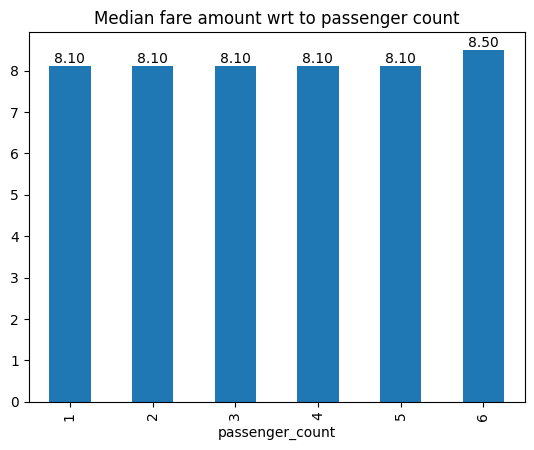

In [71]:
ax=final_df.groupby('passenger_count')['fare_amount'].median().sort_values().plot(kind='bar')
plt.bar_label(ax.containers[0],fmt='%.2f')
plt.title('Median fare amount wrt to passenger count')
plt.show()

there seems to be no relationship between passenger count and fare amount.

In [72]:
final_df.groupby('Year')['fare_amount'].mean()

Year
2009     8.753388
2010     8.803071
2011     8.912502
2012     9.437389
2013    10.249436
2014    10.445234
2015    10.383465
Name: fare_amount, dtype: float64

In [73]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
final_df.groupby(['Year','Month'])['fare_amount'].mean().unstack().reindex(columns=month_order)

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2009,8.674194,8.659118,8.772762,8.830176,8.690407,8.844534,8.825251,8.659017,8.721758,8.827924,8.914099,8.616747
2010,8.425803,8.557091,8.558181,8.772692,8.785008,8.953150,8.876850,8.845946,8.960259,9.166472,8.682251,9.008510
2011,8.592111,8.703872,8.830802,8.903512,8.783584,9.014633,8.956764,8.960764,9.077351,9.004663,9.113311,8.988387
2012,8.541255,8.883662,8.837125,9.061542,9.376159,9.070161,9.068267,9.011005,10.381669,10.594396,10.290245,10.219633
2013,9.700501,9.982801,9.901134,10.255209,10.425819,10.314834,10.453554,10.166652,10.489266,10.497713,10.394166,10.423455
2014,9.875907,10.129167,10.141387,10.575144,10.642502,10.672351,10.509230,10.405903,10.584808,10.616587,10.541404,10.676379
2015,9.925878,10.236506,10.303975,10.420014,10.695234,10.710918,NaN,NaN,NaN,NaN,NaN,NaN


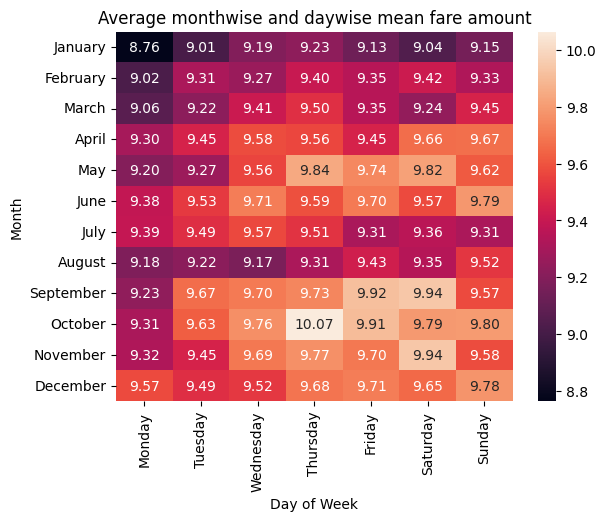

In [74]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data1=final_df.groupby(['Month','Day of Week'])['fare_amount'].mean().unstack().reindex(index=month_order, columns=day_order)
sns.heatmap(data1,annot=True,fmt='.2f')
plt.title('Average monthwise and daywise mean fare amount')
plt.show()

Text(0.5, 1.0, 'hour-wise mean fare amount for each day of week')

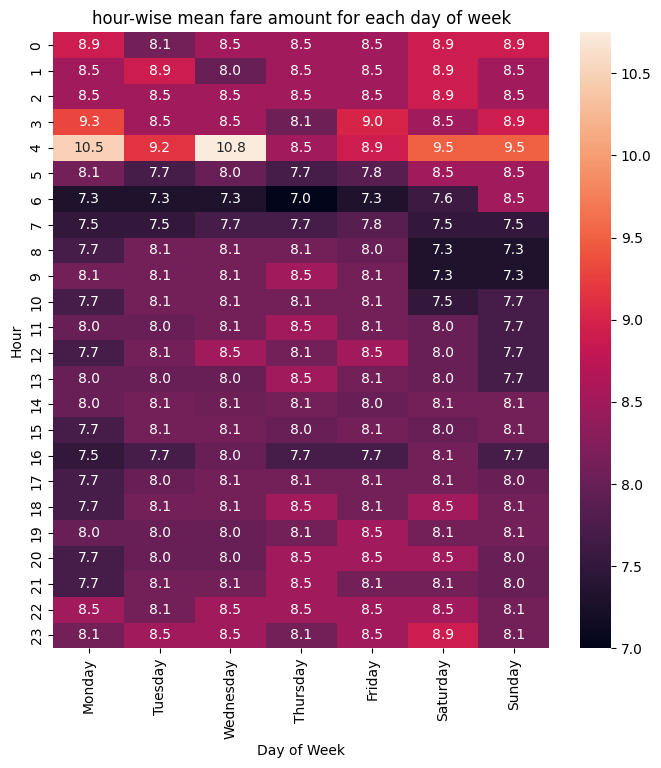

In [75]:
data_1=final_df.groupby(['Day of Week','Hour'])['fare_amount'].median().unstack().T.reindex(columns=day_order)
plt.figure(figsize=(8,8))
sns.heatmap(data_1,annot=True,fmt='.1f')
plt.title('hour-wise mean fare amount for each day of week')


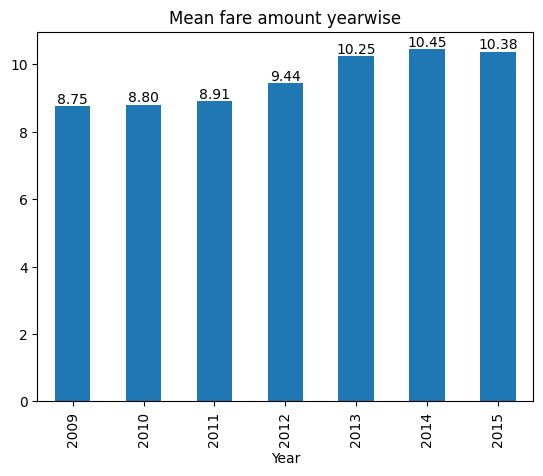

In [76]:
ax=final_df.groupby(['Year'])['fare_amount'].mean().plot(kind='bar')
plt.bar_label(ax.containers[0],fmt='%.2f')
plt.title('Mean fare amount yearwise')
plt.show()

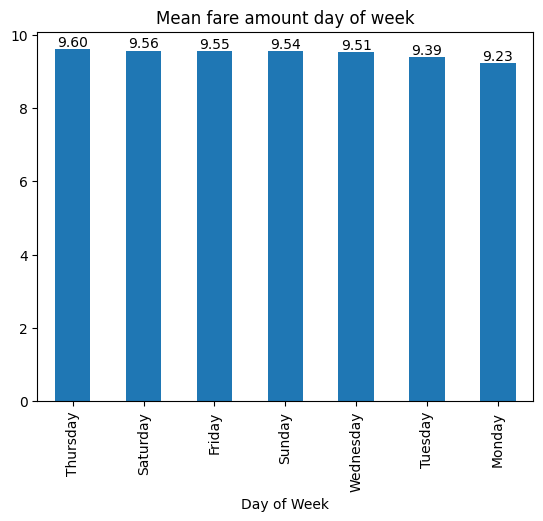

In [77]:
ax=final_df.groupby(['Day of Week'])['fare_amount'].mean().nlargest(10).plot(kind='bar')
plt.bar_label(ax.containers[0],fmt='%.2f')
plt.title('Mean fare amount day of week')
plt.show()

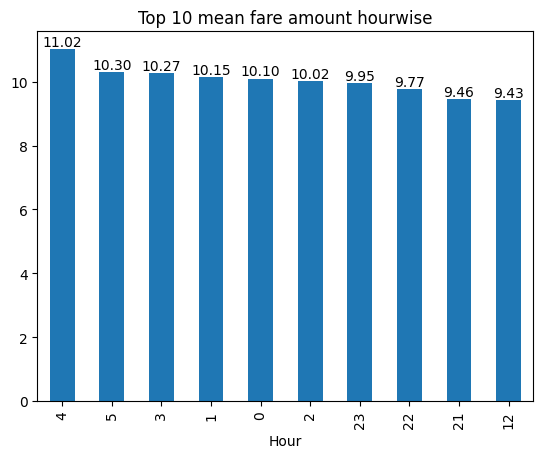

In [78]:
ax=final_df.groupby(['Hour'])['fare_amount'].mean().nlargest(10).plot(kind='bar')
plt.bar_label(ax.containers[0],fmt='%.2f')
plt.title('Top 10 mean fare amount hourwise')
plt.show()

1.Mean fare amount shows an inreasing trend over the years.


2.Fare amount of Monday and Tuesday, is definitely the least while remaining days have similar fare amounts.




3.Fare amounts tend to be highest at the early hours and midnight.

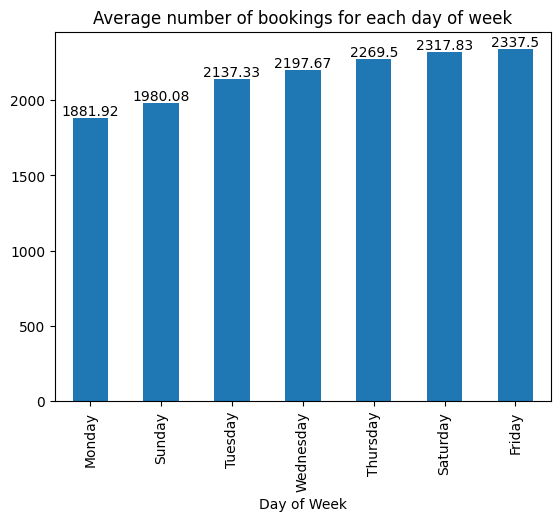

In [79]:
ax=final_df.groupby('Month')['Day of Week'].value_counts().groupby('Day of Week').mean().sort_values().plot(kind='bar')
plt.bar_label(ax.containers[0])
plt.title('Average number of bookings for each day of week')
plt.show()

As per the dataset, most number of bookings is seen on Friday.

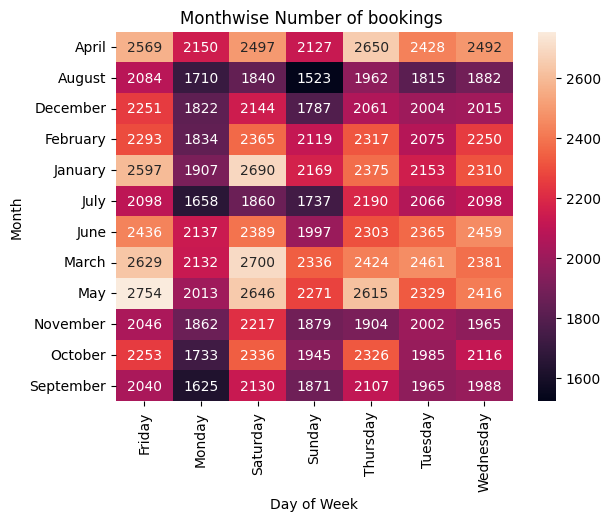

In [80]:
data2=final_df.groupby('Month')['Day of Week'].value_counts().unstack()
sns.heatmap(data2,annot=True,fmt='d')
# Show the plot
plt.title('Monthwise Number of bookings ')
plt.show()


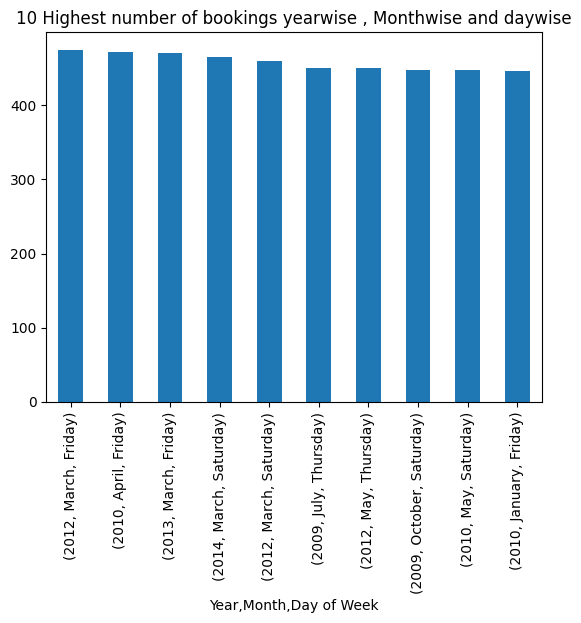

In [81]:
final_df.groupby(['Year','Month'])['Day of Week'].value_counts().nlargest(10).plot(kind='bar')
plt.title('10 Highest number of bookings yearwise , Monthwise and daywise')
plt.show()

Over the years, it can be seen that most bookings have been done on , Friday or Saturday.

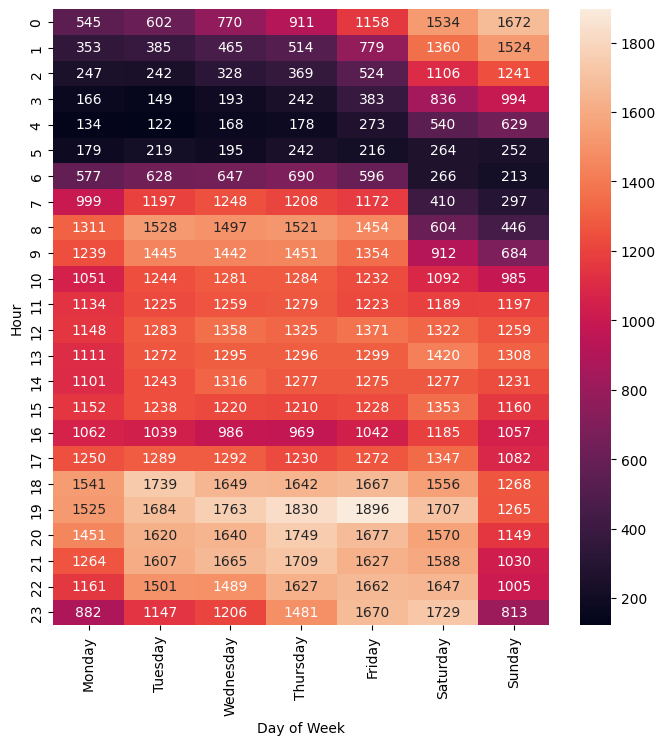

In [82]:
data3=final_df.groupby(['Day of Week'])['Hour'].value_counts().unstack().T.reindex(columns=day_order)
# Increase the figure size
plt.figure(figsize=(8, 8))
sns.heatmap(data3,annot=True,fmt='d')
plt.show()

1. Maximum bookings happen after 19:00hrs.
2. We could see lesser bookings at the early hours.

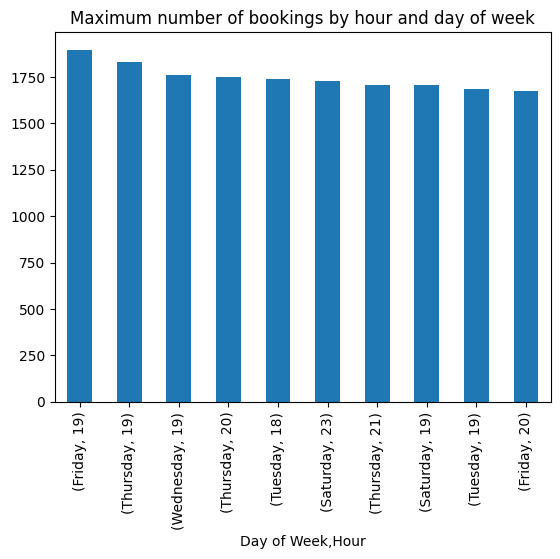

In [83]:
final_df.groupby(['Day of Week'])['Hour'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Maximum number of bookings by hour and day of week')
plt.show()

One Hot encoding

In [84]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181462 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   key                 181462 non-null  object             
 1   fare_amount         181462 non-null  float64            
 2   pickup_datetime     181462 non-null  datetime64[ns, UTC]
 3   pickup_longitude    181462 non-null  float64            
 4   pickup_latitude     181462 non-null  float64            
 5   dropoff_longitude   181462 non-null  float64            
 6   dropoff_latitude    181462 non-null  float64            
 7   passenger_count     181462 non-null  int64              
 8   Year                181462 non-null  int32              
 9   Date                181462 non-null  int32              
 10  Hour                181462 non-null  int32              
 11  Month               181462 non-null  object             
 12  Day of Week         1

In [85]:
model_data=final_df.drop(['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','key'],axis=1)

In [86]:
model_data

,fare_amount,passenger_count,Year,Date,Hour,Month,Day of Week,manhattan_distance
0,7.5,1,2015,7,19,May,Thursday,0.015442
1,7.7,1,2009,17,20,July,Friday,0.022455
2,12.9,1,2009,24,21,August,Monday,0.074355
3,5.3,3,2009,26,8,June,Friday,0.023313
4,16.0,5,2014,28,17,August,Thursday,0.065221
...,...,...,...,...,...,...,...,...
199994,12.0,1,2014,31,14,January,Friday,0.016691
199995,3.0,1,2012,28,10,October,Sunday,0.001447
199996,7.5,1,2014,14,1,March,Friday,0.024733
199998,14.5,1,2015,20,14,May,Wednesday,0.043945


In [87]:
model_data['Year']=model_data['Year'].astype('category')
model_data['Date']=model_data['Date'].astype('category')
model_data['Hour']=model_data['Hour'].astype('category')
model_data['passenger_count']=model_data['passenger_count'].astype('category')

In [88]:
data=pd.get_dummies(model_data,drop_first=True)
data

,fare_amount,manhattan_distance,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,Year_2010,Year_2011,Year_2012,...,Month_May,Month_November,Month_October,Month_September,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday
0,7.5,0.015442,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
1,7.7,0.022455,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,12.9,0.074355,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,5.3,0.023313,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,16.0,0.065221,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,12.0,0.016691,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199995,3.0,0.001447,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,True,False,False,False
199996,7.5,0.024733,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199998,14.5,0.043945,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


In [89]:
data.corr()['fare_amount'].sort_values(ascending=False).head(10) ## Top 10 correlated feature.

fare_amount           1.000000
manhattan_distance    0.833600
Year_2014             0.079929
Year_2013             0.065204
Year_2015             0.048592
Hour_4                0.032807
Hour_1                0.023291
Hour_23               0.020817
Hour_3                0.020250
Month_October         0.016651
Name: fare_amount, dtype: float64

In [90]:
data.corr()['fare_amount'].sort_values(ascending=True).head(10) ## Top 10 negatively correlated feature.

Year_2010            -0.058523
Year_2011            -0.050322
Month_January        -0.025618
Hour_7               -0.020032
Day of Week_Monday   -0.019995
Hour_6               -0.017721
Hour_16              -0.012859
Month_February       -0.011119
Month_March          -0.010880
Hour_10              -0.009967
Name: fare_amount, dtype: float64

In [91]:
X=data.drop('fare_amount',axis=1)# predictor Variable
X

,manhattan_distance,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,Year_2010,Year_2011,Year_2012,Year_2013,...,Month_May,Month_November,Month_October,Month_September,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday
0,0.015442,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
1,0.022455,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.074355,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.023313,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.065221,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,0.016691,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199995,0.001447,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False
199996,0.024733,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199998,0.043945,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


In [92]:
y=data.iloc[:,0] # Target Variable
y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199994    12.0
199995     3.0
199996     7.5
199998    14.5
199999    14.1
Name: fare_amount, Length: 181462, dtype: float64

In [93]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
X_train

,manhattan_distance,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,Year_2010,Year_2011,Year_2012,Year_2013,...,Month_May,Month_November,Month_October,Month_September,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday
134218,0.040758,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
128438,0.027695,False,False,False,False,False,False,False,True,False,...,False,False,False,True,True,False,False,False,False,False
51710,0.013095,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
140226,0.032950,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
119694,0.017444,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132138,0.035791,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
114290,0.055355,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
145370,0.030588,True,False,False,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False
161920,0.019592,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [95]:
from sklearn.preprocessing import StandardScaler
# Standardize the feature matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Applying Linear regression model
Fitting OLS model on training dataset


In [96]:
import statsmodels.api as sm

# Fit the linear regression model
X_train_ols = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_train_ols)
results = model.fit()

# Get the summary of the model
summary = results.summary()

# Print the summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     4735.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        04:39:35   Log-Likelihood:            -3.4450e+05
No. Observations:              145169   AIC:                         6.892e+05
Df Residuals:                  145086   BIC:                         6.900e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4834      0.007   1391.203      0.0

Using OLS for prediction

In [97]:
X_test_ols = sm.add_constant(X_test_scaled) ## Adding constant term to
y_pred_ols = results.predict(X_test_ols)
# Predict on the test data using the OLS model

r2_ols = r2_score(y_test, y_pred_ols)
rmse_ols = mean_squared_error(y_test, y_pred_ols, squared=False)

# Print the evaluation metrics
print("OLS R-squared score:", r2_ols)
print("OLS RMSE:", rmse_ols)

OLS R-squared score: 0.7399129996493572
OLS RMSE: 2.554606602979803


Sklearn's Linear Regression.
Also, using cross validation

In [98]:
# Create an instance of the Linear Regression model
model = LinearRegression(fit_intercept=True)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Perform cross-validation with MSE, RMSE, and R-squared as the scoring metrics
scoring = ['neg_mean_squared_error', 'r2']
cv_results = cross_validate(model, X_train_scaled, y_train, cv=5, scoring=scoring)

# Extract the scores from cross-validation results
mse_scores = -cv_results['test_neg_mean_squared_error']
rmse_scores = np.sqrt(mse_scores)
r2_scores = cv_results['test_r2']

# Calculate the average MSE, RMSE, and R-squared score
average_mse = np.mean(mse_scores)
average_rmse = np.mean(rmse_scores)
average_r2 = np.mean(r2_scores)

# Print the cross-validation scores, average MSE, RMSE, and R-squared score
print("Cross-Validation Scores (MSE):", mse_scores)
print("Cross-Validation Scores (RMSE):", rmse_scores)
print("Cross-Validation Scores (R-squared):", r2_scores)
print("Average MSE:", average_mse)
print("Average RMSE:", average_rmse)
print("Average R-squared:", average_r2)


Cross-Validation Scores (MSE): [6.82755989 6.70583718 6.61055044 6.71534773 6.89355522]
Cross-Validation Scores (RMSE): [2.61295999 2.58956312 2.57109907 2.5913988  2.62555808]
Cross-Validation Scores (R-squared): [0.72480878 0.73266726 0.73220517 0.72916314 0.71915543]
Average MSE: 6.750570089034978
Average RMSE: 2.598115811382413
Average R-squared: 0.7275999573238359


In [99]:
# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Calculate MSE, RMSE, and R-squared score for test data
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred,squared=True)
rmse = mean_squared_error(y_test, y_pred,squared=False)
rmse_mean=mean_squared_error(y_test, y_pred,squared=False)/y_test.mean()


print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
print("The root mean squared error (MSE) by mean on test set: {:.4f}".format(rmse_mean))
print("R-squared score (Test):", r2)

The mean absolute error (MAE) on test set: 1.7829
The mean squared error (MSE) on test set: 6.5260
The root mean squared error (RMSE) on test set: 2.5546
The root mean squared error (MSE) by mean on test set: 0.2684
R-squared score (Test): 0.7399129996493572


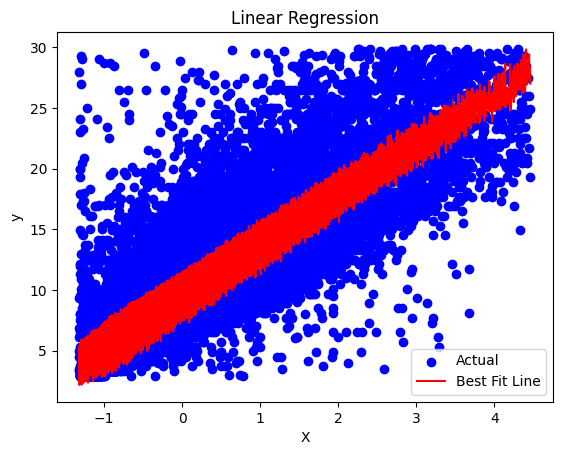

In [100]:
# Sort the values for a smoother line plot
sorted_indexes = np.argsort(X_test_scaled[:, 0])
X_test_sorted = X_test_scaled[sorted_indexes]
y_pred_sorted = y_pred[sorted_indexes]

# Plot the data points
plt.scatter(X_test_scaled[:, 0], y_test, color='b', label='Actual')

# Plot the best fit line
plt.plot(X_test_sorted[:, 0], y_pred_sorted, color='r', label='Best Fit Line')

# Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')

# Show the legend
plt.legend()

# Show the plot
plt.show()


Check for heteroskedasticity of residuals

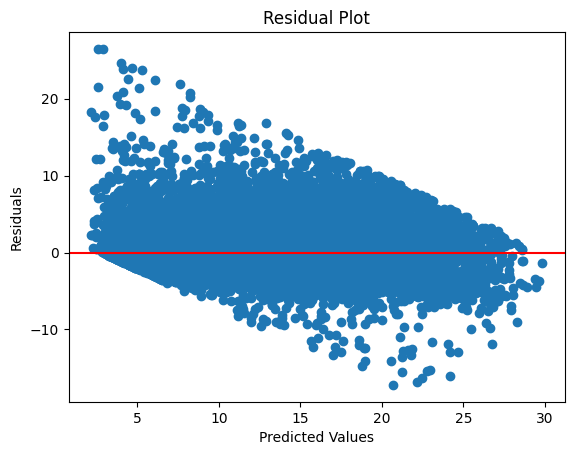

In [101]:
residuals = y_test - y_pred

## residuals against the predicted values

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Statistical check for heteroskedasticity.

In [104]:
import statsmodels.api as sm

# Add a constant column to the exogenous variables
X_test_with_constant = sm.add_constant(X_test)

# Perform the Breusch-Pagan test
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(residuals, X_test_with_constant)

# Print the p-value of the Breusch-Pagan test
print("Breusch-Pagan test p-value: ", lm_pvalue)

if lm_pvalue < 0.05:
    print("The null hypothesis is rejected. There is evidence of heteroskedasticity.")
else:
    print("The null hypothesis is not rejected. There is no significant evidence of heteroskedasticity.")


Breusch-Pagan test p-value:  8.443650711093015e-204
The null hypothesis is rejected. There is evidence of heteroskedasticity.


Find autocorrelation of residuals

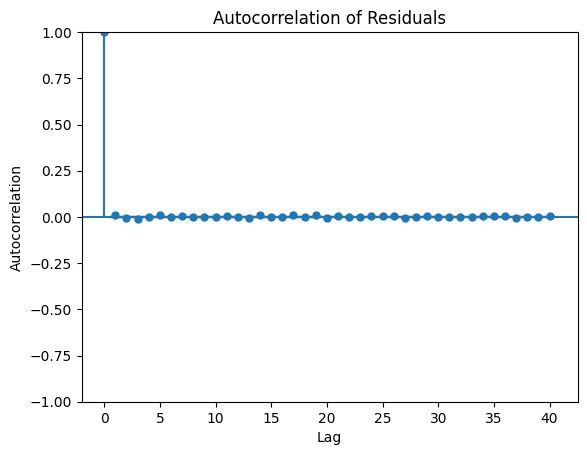

In [105]:
# Plot the autocorrelation of residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)

# Set plot title and labels
plt.title('Autocorrelation of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Display the plot
plt.show()

Clearly, there is no autocorrelation in the residuals.
Statistical check for auto correlation

In [106]:
# Perform the Durbin-Watson test
durbin_watson_statistic = sm.stats.stattools.durbin_watson(residuals)

# Print the Durbin-Watson test statistic
print("Durbin-Watson test statistic:", durbin_watson_statistic)


Durbin-Watson test statistic: 1.9763303696507555


A value close to 2 suggests no significant autocorrelation, between the residuals which can be seen in the plot.

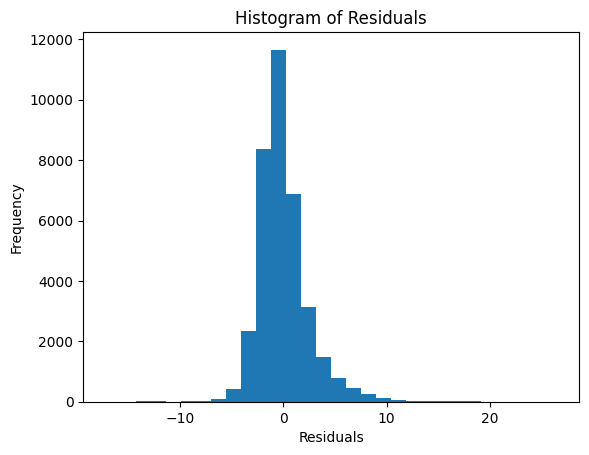

In [107]:
# Plot histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

QQ Plot of residual

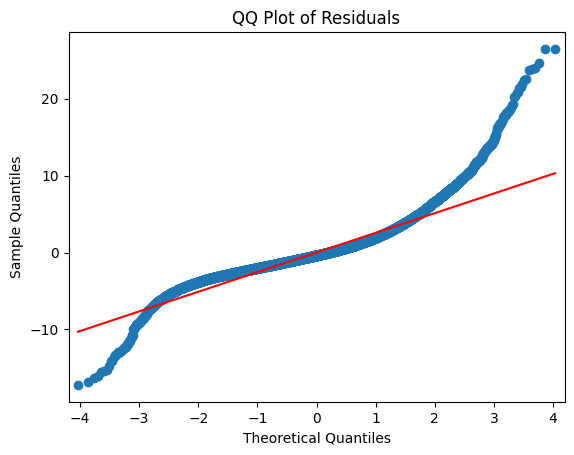

In [108]:
sm.qqplot(residuals, line='s')
plt.title("QQ Plot of Residuals")
plt.show()

Statistical check for normality of residuals

In [109]:
# Checking if residual is normal or not.
stat, p_value = shapiro(residuals)

alpha = 0.05  # Set significance level
if p_value > alpha:
    print("Residuals follow a normal distribution.")
else:
    print("Residuals do not follow a normal distribution.")


Residuals do not follow a normal distribution.


In [110]:
# Calculate the Jarque-Bera test statistic and p-value
jb_stat, jb_p_value = stats.jarque_bera(residuals)

# Print the results
print("P-value:", jb_p_value)

if jb_p_value > alpha:
    print("The residuals are approximately normally distributed.")
else:
    print("The residuals do not follow a normal distribution.")

P-value: 0.0
The residuals do not follow a normal distribution.


Although, our linear regression model gives improved results in test compared to train data,
but we can see our linear model does not follow the assumptions. Hence, It can not be generalised.


Applying Lasso Regression and feature selection

In [111]:
# Step 4: Initialize and Fit the Lasso Regression Model
lasso = Lasso(alpha=0.1,fit_intercept=True)  # Set the regularization strength (alpha)
lasso.fit(X_train_scaled, y_train)

# Step 5: Evaluate the Model
y_pred = lasso.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)

# Calculate the adjusted R-squared
n = X_test_scaled.shape[0]  # number of samples
p = X_test_scaled.shape[1]  # number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred,squared=True)
rmse = mean_squared_error(y_test, y_pred,squared=False)
rmse_mean=mean_squared_error(y_test, y_pred,squared=False)/y_test.mean()


print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
print("The root mean squared error (MSE) by mean on test set: {:.4f}".format(rmse_mean))
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)

The mean absolute error (MAE) on test set: 1.8374
The mean squared error (MSE) on test set: 6.8456
The root mean squared error (RMSE) on test set: 2.6164
The root mean squared error (MSE) by mean on test set: 0.2749
R-squared: 0.7271761387968702
Adjusted R-squared: 0.7265583106660042


In [112]:
# Get the coefficients of the features
feature_coef = dict(zip(X.columns, lasso.coef_))
feature_coef

{'manhattan_distance': 4.057371865680208,
 'passenger_count_2': 0.0,
 'passenger_count_3': 0.0,
 'passenger_count_4': 0.0,
 'passenger_count_5': 0.0,
 'passenger_count_6': 0.0,
 'Year_2010': -0.05885936158638422,
 'Year_2011': -0.017885810761856344,
 'Year_2012': 0.0,
 'Year_2013': 0.3540991281599576,
 'Year_2014': 0.4219778574405546,
 'Year_2015': 0.2802662967309678,
 'Date_2': -0.0,
 'Date_3': -0.0,
 'Date_4': 0.0,
 'Date_5': -0.0,
 'Date_6': 0.0,
 'Date_7': -0.0,
 'Date_8': 0.0,
 'Date_9': 0.0,
 'Date_10': -0.0,
 'Date_11': -0.0,
 'Date_12': 0.0,
 'Date_13': 0.0,
 'Date_14': 0.0,
 'Date_15': -0.0,
 'Date_16': -0.0,
 'Date_17': 0.0,
 'Date_18': 0.0,
 'Date_19': 0.0,
 'Date_20': 0.0,
 'Date_21': 0.0,
 'Date_22': -0.0,
 'Date_23': 0.0,
 'Date_24': -0.0,
 'Date_25': -0.0,
 'Date_26': -0.0,
 'Date_27': -0.0,
 'Date_28': -0.0,
 'Date_29': -0.0,
 'Date_30': 0.0,
 'Date_31': -0.0,
 'Hour_1': -0.0,
 'Hour_2': -0.006421136993028938,
 'Hour_3': -0.0,
 'Hour_4': -0.0,
 'Hour_5': -0.0,
 'Hour_6'

In [113]:
important_features = [feature for feature, coef in feature_coef.items() if coef != 0.0]
print(important_features)

['manhattan_distance', 'Year_2010', 'Year_2011', 'Year_2013', 'Year_2014', 'Year_2015', 'Hour_2', 'Hour_6', 'Hour_7', 'Hour_12', 'Day of Week_Sunday']


In [114]:
selected_features=data.columns[data.columns.isin(important_features)]
imp_feature=data[selected_features]
imp_feature

,manhattan_distance,Year_2010,Year_2011,Year_2013,Year_2014,Year_2015,Hour_2,Hour_6,Hour_7,Hour_12,Day of Week_Sunday
0,0.015442,False,False,False,False,True,False,False,False,False,False
1,0.022455,False,False,False,False,False,False,False,False,False,False
2,0.074355,False,False,False,False,False,False,False,False,False,False
3,0.023313,False,False,False,False,False,False,False,False,False,False
4,0.065221,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
199994,0.016691,False,False,False,True,False,False,False,False,False,False
199995,0.001447,False,False,False,False,False,False,False,False,False,True
199996,0.024733,False,False,False,True,False,False,False,False,False,False
199998,0.043945,False,False,False,False,True,False,False,False,False,False


In [115]:
X1=imp_feature

In [116]:
# Split the data into training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [117]:
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

We are using the selected features from lasso to apply the polynomial regression Model.

In [118]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X1_train_poly = poly_features.fit_transform(X1_train_scaled)
X1_test_poly = poly_features.transform(X1_test_scaled)

In [119]:
poly_regression = LinearRegression()
poly_regression.fit(X1_train_poly, y1_train)

LinearRegression()

In [120]:
y1_pred = poly_regression.predict(X1_test_poly)

# Calculate evaluation metrics
mae = mean_absolute_error(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred,squared=True)
rmse = mean_squared_error(y1_test, y1_pred,squared=False)
rmse_mean=mean_squared_error(y1_test, y1_pred,squared=False)/y_test.mean()


print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
print("The root mean squared error (RMSE) by mean on test set: {:.4f}".format(rmse_mean))

The mean absolute error (MAE) on test set: 1.7863
The mean squared error (MSE) on test set: 6.5701
The root mean squared error (RMSE) on test set: 2.5632
The root mean squared error (RMSE) by mean on test set: 0.2693


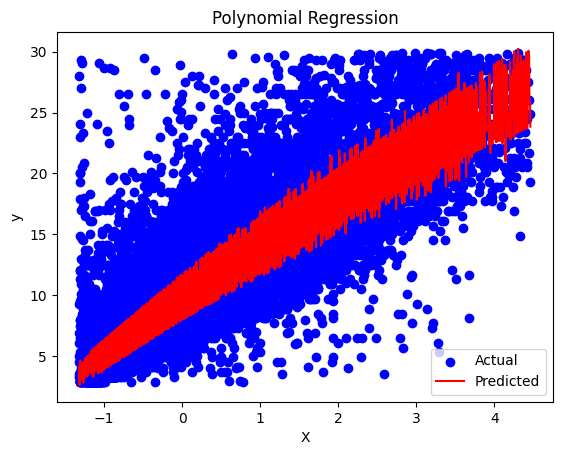

In [121]:
# Sort the values for a smoother line plot
sorted_indexes = np.argsort(X1_test_poly[:, 1])
X1_test_sorted = X1_test_poly[sorted_indexes]
y1_pred_sorted = y1_pred[sorted_indexes]

# Plot the data points
plt.scatter(X1_test_poly[:, 1], y1_test, color='b', label='Actual')

# Plot the best fit curve
plt.plot(X1_test_sorted[:, 1], y1_pred_sorted, color='r', label='Predicted')

# Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')

# Show the legend
plt.legend()

# Show the plot
plt.show()



Decision Tree Regression Model

In [122]:
# Create an instance of DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict using the trained model
y3_pred = model.predict(X_test)

# Evaluate the model

mae = mean_absolute_error(y_test, y3_pred)
mse = mean_squared_error(y_test, y3_pred,squared=True)
rmse = mean_squared_error(y_test, y3_pred,squared=False)
rmse_mean=mean_squared_error(y_test, y3_pred,squared=False)/y_test.mean()


print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
print("The root mean squared error (RMSE) by mean on test set: {:.4f}".format(rmse_mean))

The mean absolute error (MAE) on test set: 2.4340
The mean squared error (MSE) on test set: 12.3433
The root mean squared error (RMSE) on test set: 3.5133
The root mean squared error (RMSE) by mean on test set: 0.3692


Hyper-parametric tuning of Decision tree

In [123]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': randint(1, 10),              # Maximum depth of the tree
    'min_samples_split': randint(2, 10),       # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),        # Minimum number of samples required to be at a leaf node
    'max_features': ['auto','sqrt','log2'],                    # Number of features to consider at each split
}

# Create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5,random_state=42)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean squared error (MSE)
print("Best Hyperparameters:", random_search.best_params_)
print("Best MSE:", -random_search.best_score_)

# Obtain the best model from the random search
best_model = random_search.best_estimator_


Best Hyperparameters: {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 9}
Best MSE: 6.8149886841056


In [125]:
# Predict using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred,squared=True)
rmse = mean_squared_error(y_test, y_pred,squared=False)
rmse_mean=mean_squared_error(y_test, y_pred,squared=False)/y_test.mean()


print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
print("The root mean squared error (RMSE) by mean on test set: {:.4f}".format(rmse_mean))

The mean absolute error (MAE) on test set: 1.8043
The mean squared error (MSE) on test set: 6.6164
The root mean squared error (RMSE) on test set: 2.5722
The root mean squared error (RMSE) by mean on test set: 0.2703


Random Forest Regression Model

In [126]:
# Create an instance of RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict using the trained model
y4_pred= model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y4_pred)
mse = mean_squared_error(y_test, y4_pred,squared=True)
rmse = mean_squared_error(y_test, y4_pred,squared=False)
rmse_mean=mean_squared_error(y_test, y4_pred,squared=False)/y_test.mean()


print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
print("The root mean squared error (RMSE) by mean on test set: {:.4f}".format(rmse_mean))

The mean absolute error (MAE) on test set: 1.8008
The mean squared error (MSE) on test set: 6.6423
The root mean squared error (RMSE) on test set: 2.5773
The root mean squared error (RMSE) by mean on test set: 0.2708


Using ADABOOST

In [127]:
# Create an instance of AdaBoostRegressor
model = AdaBoostRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred,squared=True)
rmse = mean_squared_error(y_test, y_pred,squared=False)
rmse_mean=mean_squared_error(y_test, y_pred,squared=False)/y_test.mean()


print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
print("The root mean squared error (RMSE) by mean on test set: {:.4f}".format(rmse_mean))

The mean absolute error (MAE) on test set: 4.3512
The mean squared error (MSE) on test set: 23.9100
The root mean squared error (RMSE) on test set: 4.8898
The root mean squared error (RMSE) by mean on test set: 0.5138


In [128]:
# Create an instance of DecisionTreeRegressor as the base estimator
base_estimator = DecisionTreeRegressor(max_depth=3,random_state=42)

# Create an instance of AdaBoostRegressor with the decision tree base estimator
model = AdaBoostRegressor(base_estimator=base_estimator)

# Train the model
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred,squared=True)
rmse = mean_squared_error(y_test, y_pred,squared=False)
rmse_mean=mean_squared_error(y_test, y_pred,squared=False)/y_test.mean()


print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
print("The root mean squared error (RMSE) by mean on test set: {:.4f}".format(rmse_mean))

The mean absolute error (MAE) on test set: 3.9357
The mean squared error (MSE) on test set: 19.9310
The root mean squared error (RMSE) on test set: 4.4644
The root mean squared error (RMSE) by mean on test set: 0.4691


GradientBoostRegressor

In [129]:
reg = GradientBoostingRegressor(n_estimators=500, max_depth=4, min_samples_split=5, learning_rate=0.01, loss="squared_error",random_state=0)
reg.fit(X_train, y_train)

y_pred=reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred,squared=True)
rmse = mean_squared_error(y_test, y_pred,squared=False)
rmse_mean=mean_squared_error(y_test, y_pred,squared=False)/y_test.mean()


print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
print("The root mean squared error (RMSE) by mean on test set: {:.4f}".format(rmse_mean))

The mean absolute error (MAE) on test set: 1.7776
The mean squared error (MSE) on test set: 6.4021
The root mean squared error (RMSE) on test set: 2.5302
The root mean squared error (RMSE) by mean on test set: 0.2659


In [135]:
result_df= pd.DataFrame({'MAE':[1.7829,1.8374,1.7862,1.8043, 1.8004,4.1505,1.7776],
                         'MSE':[6.5260,6.8456,6.5708,6.6167,6.6429,21.8680,6.4021],
                         'RMSE':[2.5546,2.6164,2.5633,2.5723,2.5774, 4.6763,2.5302],
    'RMSE/(Mean of y in test)' : [0.2684,0.2749,0.2693,0.2703,0.2708,0.4914,0.2659]},
                 index=['Linear Regression','Lasso Regression','Polynomial Regression','Decision Tree Regressor(tuned)','Random Forest Regressor', 'Adaboost Regressor','GradientBoost Regressor'])
result_df

,MAE,MSE,RMSE,RMSE/(Mean of y in test)
Linear Regression,1.7829,6.5260,2.5546,0.2684
Lasso Regression,1.8374,6.8456,2.6164,0.2749
Polynomial Regression,1.7862,6.5708,2.5633,0.2693
Decision Tree Regressor(tuned),1.8043,6.6167,2.5723,0.2703
Random Forest Regressor,1.8004,6.6429,2.5774,0.2708
Adaboost Regressor,4.1505,21.8680,4.6763,0.4914
GradientBoost Regressor,1.7776,6.4021,2.5302,0.2659


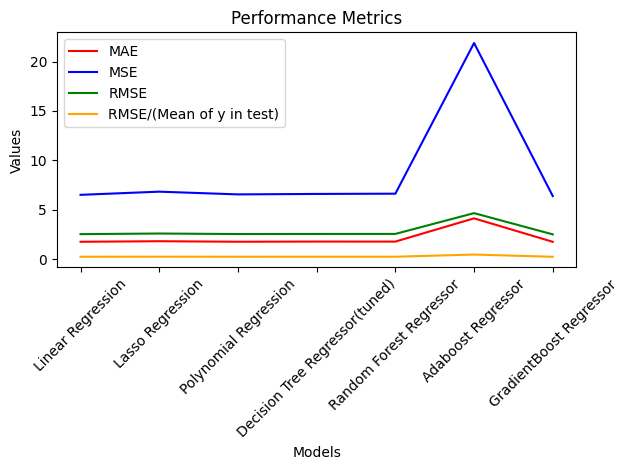

In [131]:
# Set the colors for each line
colors = ['red', 'blue', 'green', 'orange']

# Plot the line chart
result_df.plot(kind='line', color=colors)

# Set the title and labels
plt.title('Performance Metrics')
plt.xlabel('Models')
plt.ylabel('Values')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Fix the overlapping issue
plt.tight_layout()

# Display the plot
plt.show()

Applying xgboost regressor for better result

In [132]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create an instance of XGBRegressor
model_xgb = xgb.XGBRegressor(random_state=42)

# Train the model
model_xgb.fit(X_train, y_train)

# Predict using the trained model
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
rmse_mean_xgb = rmse_xgb / y_test.mean()

print("XGBoost Results:")
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae_xgb))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_xgb))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_xgb))
print("The root mean squared error (RMSE) by mean on test set: {:.4f}".format(rmse_mean_xgb))

XGBoost Results:
The mean absolute error (MAE) on test set: 1.7206
The mean squared error (MSE) on test set: 6.1236
The root mean squared error (RMSE) on test set: 2.4746
The root mean squared error (RMSE) by mean on test set: 0.2600


The best result has thus, been seen in XGBoost Regression model.

Conclusions
There is a scope of improving results in ensemble models. This can be explored through hyperparameter tuning. RandomSearchCV or GridsearchCV can be applied for same.
XGboost have been used here for better results.
Choice of error metric- We have used MAE, MSE,RMSE and RMSE by mean of target to evaluate the model.